In [1]:
%pylab inline
import pandas as pd
from sklearn import preprocessing, cluster, decomposition, metrics
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## US National Demographic and Nutrition Survey 2013-2014.

### Question

Business Question: How can we group and analyze potential customers?

Rephrasing: __From the survey, are there naturally occuring groups of people in the country?__

In [2]:
df = pd.read_csv('data/demographic.csv')

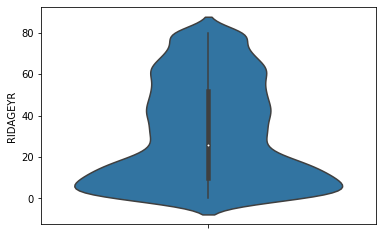

In [51]:
sns.violinplot(data=df, y='RIDAGEYR')

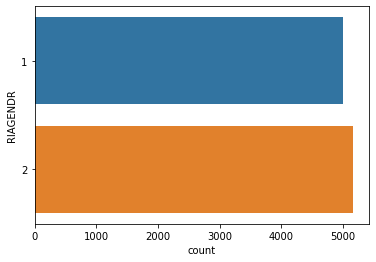

In [54]:
sns.countplot(data=df, y='RIAGENDR')

In [3]:
df.dropna(axis=1).corr()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,SIALANG,SIAINTRP,...,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
SEQN,1.000000,NaN,0.000993,-0.005641,0.009062,0.015414,0.015294,-0.006583,-0.009136,-0.006893,...,-0.003281,-0.004939,-0.003287,0.007819,-0.014161,0.010715,0.002574,0.000578,-0.012445,0.007297
SDDSRVYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIDSTATR,0.000993,NaN,1.000000,-0.006361,0.031009,-0.033489,-0.038509,-0.020817,0.014233,-0.012269,...,0.014172,-0.015935,0.019580,0.011711,-0.019119,0.008711,0.017483,0.210254,-0.011409,0.027092
RIAGENDR,-0.005641,NaN,-0.006361,1.000000,0.031919,-0.014514,-0.011942,-0.002275,0.006761,-0.009991,...,-0.006946,0.008716,0.004910,-0.000282,0.184106,0.022300,0.007020,0.006755,-0.009798,-0.008483
RIDAGEYR,0.009062,NaN,0.031009,0.031919,1.000000,0.033182,0.003366,0.060754,-0.018937,-0.049806,...,-0.470790,-0.460799,-0.397020,0.600243,-0.082621,0.674608,0.279609,0.269856,-0.001005,0.003239
RIDRETH1,0.015414,NaN,-0.033489,-0.014514,0.033182,1.000000,0.968423,-0.014038,-0.479819,-0.107303,...,-0.112862,-0.039971,-0.076356,0.027404,0.037429,0.041821,-0.073108,-0.070301,0.145301,0.028606
RIDRETH3,0.015294,NaN,-0.038509,-0.011942,0.003366,0.968423,1.000000,0.000083,-0.414344,-0.139569,...,-0.070088,-0.014208,-0.055903,0.010508,0.018965,0.020963,-0.112424,-0.108499,0.126214,0.016369
DMDBORN4,-0.006583,NaN,-0.020817,-0.002275,0.060754,-0.014038,0.000083,1.000000,0.079116,-0.053730,...,-0.011109,-0.022741,-0.027153,0.021787,-0.012230,0.014978,-0.029381,-0.030036,-0.014648,-0.000543
SIALANG,-0.009136,NaN,0.014233,0.006761,-0.018937,-0.479819,-0.414344,0.079116,1.000000,-0.090239,...,0.156494,0.068036,0.092469,-0.020554,-0.012435,-0.044244,-0.151626,-0.146135,-0.048902,0.049429
SIAINTRP,-0.006893,NaN,-0.012269,-0.009991,-0.049806,-0.107303,-0.139569,-0.053730,-0.090239,1.000000,...,-0.076865,-0.022975,-0.038006,-0.042852,0.008707,-0.030464,0.103696,0.097359,-0.020108,-0.087428


## Principal Components Analysis (PCA) for Feature Reduction

__Gist:__ PCA maximizes the variation of the inputs and generates principal components that emphasizes patterns from the data. 

Check out [Interactive PCA with Setosa](http://setosa.io/ev/principal-component-analysis/)

In [4]:
pca = decomposition.PCA(n_components=20, random_state=42)

In [5]:
df_reduced = pd.DataFrame(
    pca.fit_transform(df.dropna(axis=1))
)

In [6]:
df_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-24323.888116,-631.458203,5079.850565,48.839053,-0.861042,0.762921,-0.272482,0.831785,-0.443097,0.527295,0.928392,0.114033,-0.322148,0.499554,0.005475,-0.320434,0.238743,0.203616,-0.044311,0.015935
1,-9192.627527,-765.613571,5079.727563,25.725191,4.211755,-3.044889,1.572951,0.386008,-0.474029,-1.052834,0.395573,-0.760150,-0.613512,-0.313297,-0.177364,0.104960,0.234637,0.028818,-0.013419,0.001908
2,37637.289727,684.071900,5094.335332,41.889709,-5.088007,-1.744644,-0.372214,-0.370661,-0.322448,0.259157,0.620447,-0.170080,-0.331933,0.731525,0.069287,-0.380921,0.034695,0.021570,-0.010172,0.024888
3,35212.735397,223.682225,5089.867805,-31.690680,-1.386616,-1.482018,-0.227033,0.002952,-0.050226,-1.069151,0.677514,-0.300471,0.569269,-0.009832,0.136515,-0.266945,0.061965,0.036782,0.022462,0.027855
4,48155.873768,-430.139363,5085.879942,44.099924,-10.348167,5.314636,-0.325391,-0.339110,-0.252554,0.347874,-0.133256,0.076133,0.452315,0.214723,0.783707,-0.328979,0.028506,-0.037211,-0.039798,-0.007964


#### PCA needs normalized inputs

Else, the distribution of explained variances, or how much information each principal component captures, is misrepresented.

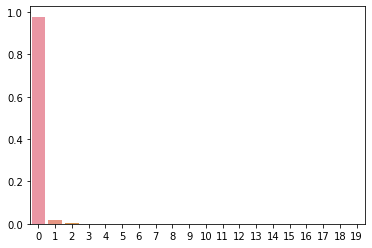

In [7]:
sns.barplot(x=[i for i in range(20)], y=pca.explained_variance_ratio_)

In [8]:
standard_scaler = preprocessing.StandardScaler()
df_normalized = pd.DataFrame(standard_scaler.fit_transform(
                                                df.dropna(axis=1)),
    columns=df.dropna(axis=1).columns
)

In [9]:
df_normalized.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,SIALANG,SIAINTRP,...,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,-1.731881,0.0,0.192067,-1.016750,1.536248,0.718871,0.440236,-0.124028,-0.343703,0.186496,...,-0.411503,-0.666305,-0.845262,2.275361,-0.999902,1.473779,-0.642145,-0.612182,-0.968744,0.251900
1,-1.731540,0.0,0.192067,-1.016750,0.922009,-0.072743,-0.179665,-0.124028,-0.343703,0.186496,...,0.151878,-0.666305,0.831257,-0.562739,-0.999902,0.514382,-0.256173,-0.218808,-0.968744,-0.687043
2,-1.731200,0.0,0.192067,-1.016750,1.659096,-0.072743,-0.179665,-0.124028,-0.343703,0.186496,...,-0.974884,-0.666305,-0.845262,2.275361,-0.999902,1.665659,0.988218,0.952343,-0.968744,-0.452307
3,-1.730859,0.0,0.192067,-1.016750,-0.920709,-0.072743,-0.179665,-0.124028,-0.343703,0.186496,...,0.151878,-0.666305,0.831257,-0.562739,-0.999902,-0.828775,0.913493,0.901276,1.032265,-0.452307
4,-1.730519,0.0,0.192067,0.983526,1.700045,-0.072743,-0.179665,-0.124028,-0.343703,0.186496,...,-0.974884,-0.666305,-0.845262,2.275361,-0.999902,2.049418,1.229241,1.251151,1.032265,1.190842


In [10]:
df_reduced = pd.DataFrame(
    pca.fit_transform(df_normalized.dropna(axis=1))
)

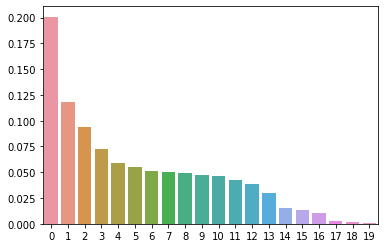

In [11]:
sns.barplot(x=[i for i in range(20)], y=pca.explained_variance_ratio_)

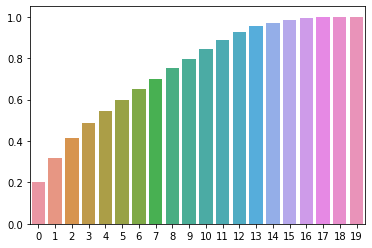

In [12]:
sns.barplot(x=[i for i in range(20)], y=np.cumsum(pca.explained_variance_ratio_))

In [13]:
# Stick with using 12 components

In [14]:
df_reduced = df_reduced[[i for i in range(13)]]

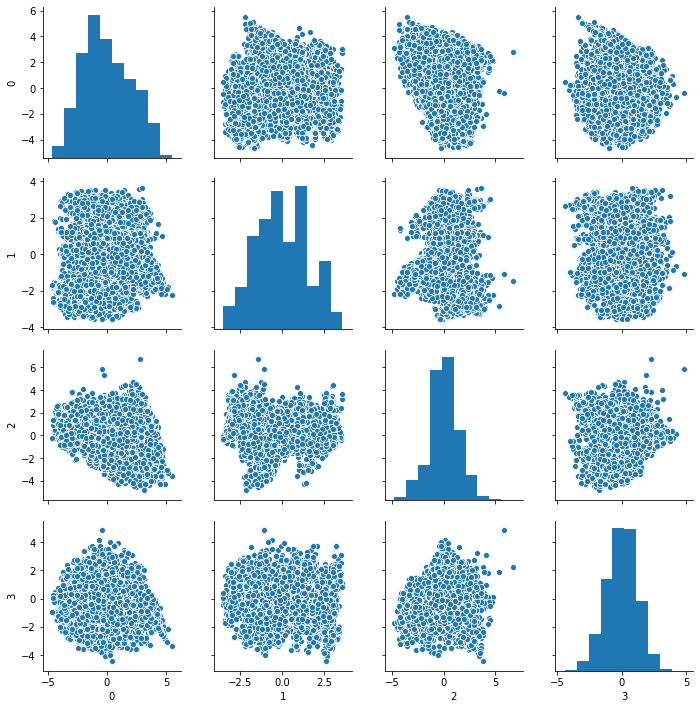

In [15]:
sns.pairplot(df_reduced[[i for i in range(4)]])

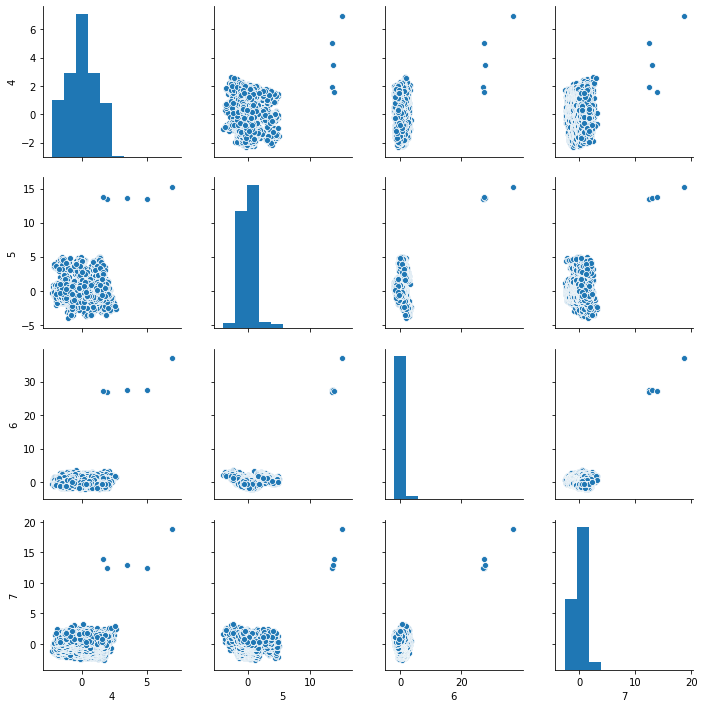

In [16]:
sns.pairplot(df_reduced[[i for i in range(4, 8)]])

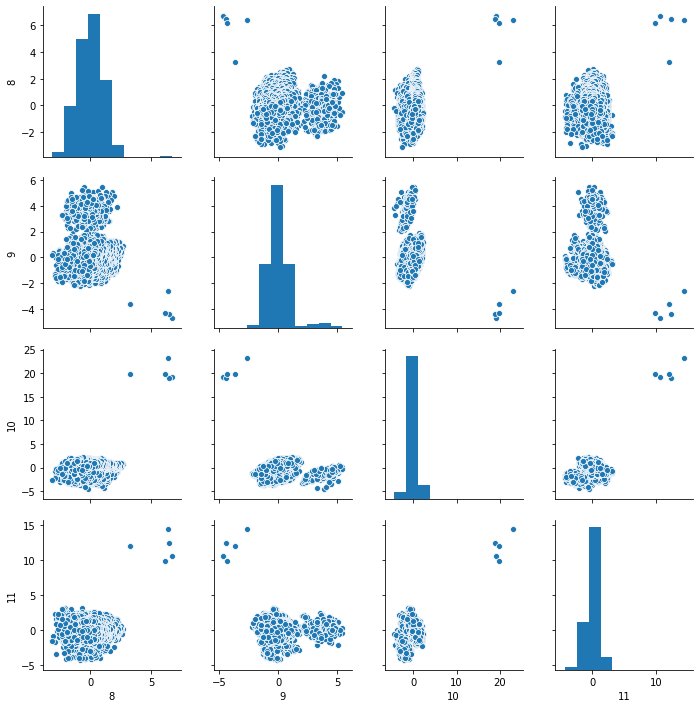

In [17]:
sns.pairplot(df_reduced[[i for i in range(8, 12)]])

### Clustering

In [18]:
# Determine the optimal number of clusters
cluster_inertias = []
cluster_silhouette_scores = []
for i in range(2, 21):
    print(f"Clustering with {i} centroids..")
    specific_inertias = []
    specific_silhouette_scores = []
    for j in range(20):
        kmeans = cluster.KMeans(n_clusters=i, n_jobs=4, random_state=j)
        kmeans.fit(df_reduced)
        specific_inertias.append(kmeans.inertia_)
        specific_silhouette_scores.append(
            metrics.silhouette_score(
                df_reduced,
                kmeans.predict(df_reduced)
            )
        )
    cluster_inertias.append(np.mean(specific_inertias))
    cluster_silhouette_scores.append(np.mean(specific_silhouette_scores))

Clustering with 2 centroids..
Clustering with 3 centroids..
Clustering with 4 centroids..
Clustering with 5 centroids..
Clustering with 6 centroids..
Clustering with 7 centroids..
Clustering with 8 centroids..
Clustering with 9 centroids..
Clustering with 10 centroids..
Clustering with 11 centroids..
Clustering with 12 centroids..
Clustering with 13 centroids..
Clustering with 14 centroids..
Clustering with 15 centroids..
Clustering with 16 centroids..
Clustering with 17 centroids..
Clustering with 18 centroids..
Clustering with 19 centroids..
Clustering with 20 centroids..


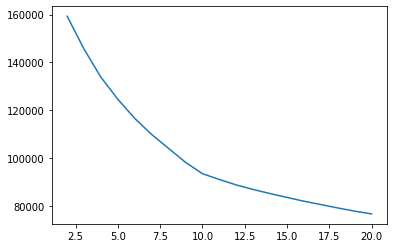

In [19]:
sns.lineplot(
    x=[i for i in range(2, 21)],
    y=cluster_inertias,
    markers=True,
)

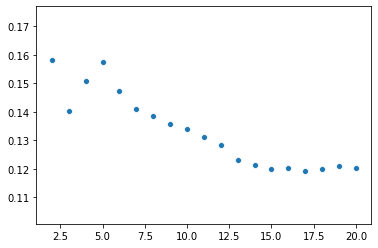

In [20]:
sns.scatterplot(
    x=[i for i in range(2, 21)],
    y=cluster_silhouette_scores,
)

In [23]:
np.argmax(cluster_silhouette_scores)+2

2

In [25]:
kmeans = cluster.KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
df['label'] = kmeans.predict(df_reduced) 

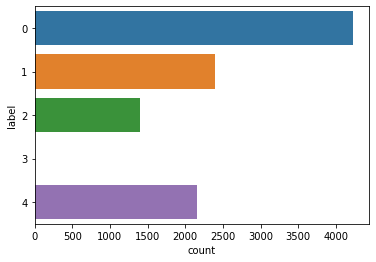

In [39]:
sns.countplot(data=df, y='label')

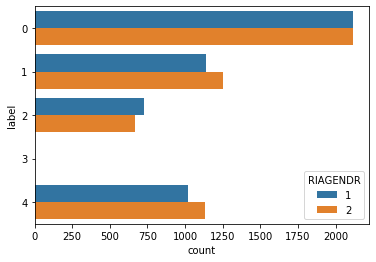

In [57]:
sns.countplot(data=df, y='label', hue='RIAGENDR')

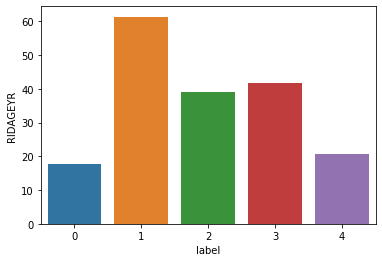

In [46]:
sns.barplot(data=df.groupby('label')['RIDAGEYR'].mean().reset_index(), x='label', y='RIDAGEYR')

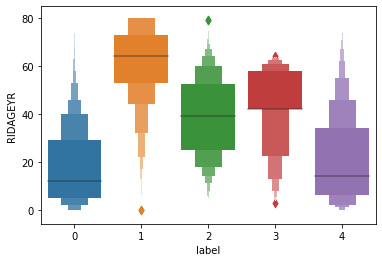

In [58]:
sns.boxenplot(data=df, x='label', y='RIDAGEYR')

In [64]:
df.groupby('label')['RIDAGEYR'].mean().sort_values()

label
0    17.611295
4    20.650233
2    38.930466
3    41.800000
1    61.389469
Name: RIDAGEYR, dtype: float64

In [55]:
df[df['label'] == 3]

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,label
212,73769,8,2,1,42,NaN,2,2,2.0,NaN,...,3.0,NaN,28964.268666,29483.520513,1,110,77.0,77.0,NaN,3
329,73886,8,2,2,64,NaN,2,2,1.0,NaN,...,77.0,NaN,13972.452054,13883.923027,1,117,15.0,15.0,5.0,3
1867,75424,8,2,1,42,NaN,2,2,1.0,NaN,...,1.0,5.0,26850.658634,26745.112107,1,109,77.0,77.0,NaN,3
5569,79126,8,1,1,3,NaN,2,2,NaN,NaN,...,6.0,NaN,14242.742857,0.000000,1,108,77.0,77.0,NaN,3
9121,82678,8,2,2,58,NaN,3,3,1.0,NaN,...,1.0,5.0,77698.923607,79347.526706,2,114,15.0,15.0,5.0,3
